<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/SPLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

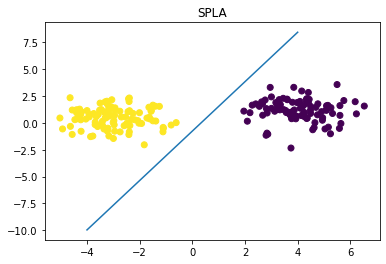

In [131]:
# SPLA (Simple Perceptron Learning Algorithm)

import numpy as np
from matplotlib import pyplot as plt

if __name__ == "__main__":
  # 100 samples 2D moved over [4, 1]
  A = np.random.randn(100, 2) + [4, 1]
  # First and second column
  Ax = A[:, 0]
  Ay = A[:, 1]
  # plt.scatter(Ax, Ay)

  # 100 samples 2D moved over [-3, 0.5]
  B = np.random.randn(100, 2) + [-3, 0.5]
  Bx = B[:, 0]
  By = B[:, 1]
  # plt.scatter(Bx, By)

  # Samples for perceptron learning
  E = np.zeros((200, 2))
  E[0:100] = A
  E[100:200] = B

  # True results for perceptron learning
  T = np.zeros((200,))
  T[0:100] = -1
  T[100:200] = 1

  # Plot with samples
  plt.scatter(E[:, 0], E[:, 1], c=T)

  # Perceptron learning variables
  if_learning = True
  learning_rate = 0.1
  k = 100
  N = 2
  THETA = np.random.randn(1)
  w = np.random.rand(1, N)  # Random weights
  processed = np.full(k * N, False)  # Processed samples

  # Perceptron learning
  while if_learning:
    # Random index of examples
    j = np.random.randint(0, 200)

    # Output - result of the neural operation on E[j] - single sample
    O = 0
    for i in range(N):
      O += w[0][i] * E[j, i]
    O -= THETA
    if O >= 0:
      O = 1
    else:
      O = -1

    # Calculate error
    ERR = T[j] - O

    # Incorrect calculating
    if ERR != 0:
      # Vectors adding
      for i in range(N):
        w[0][i] += learning_rate * ERR * E[j, i]
        THETA -= learning_rate * ERR
      processed = np.full(k * N, False)  # Reset processed samples
    else:
      # Correct processed example
      processed[j] = True  # Set as processed
    
    # All samples processed -> end of learning
    if np.all(processed):
      if_learning = False

  # Draw plot
  plt.title("SPLA")
  x1, x2 = -4, 4
  plt.plot([x1, x2], [-w[0][0]/w[0][1] * x1 + THETA/w[0][1], -w[0][0]/w[0][1] * x2 + THETA/w[0][1]]);
